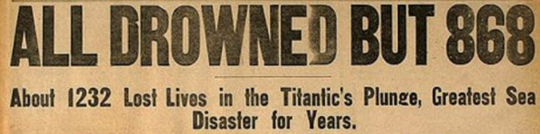

<div style="color:#424949;
           display:fill;
           border-radius:10px;
           border-style: solid;
           border-color:#424949;
           text-align:center;
           background-color:#E0D3AF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px;
           padding: 0.7em;
           text-align:left">  
This workbook is not a "quick best titanic score" kind of workbook. It is more of a journey from first viewing the data to scoring 80%.  This is my first notebook on Kaggle and I tried my best to make it readable. I tried to highlight important findings and sections of code, and I didn't delete any models that didn't perform as well. I thought it might be interesting to see how I approached this problem and not just how I solved it. I hope you enjoy it. 

### Table of Content
* [1. Data screening And Visualisations](#1.)
    - [1.1 First Look](#1.1)
    - [1.2 Parameter Explanation (where needed)](#1.2)
    - [1.3 Value Distribution](#1.3)
    - [1.4 Correlations](#1.4)
* [2. Feature Engineering](#2.)
    - [2.1 New Feature "Leading_ticket_numbers"](#2.1)
    - [2.2 New Features "Fare_per_person" Snd "Group_size"](#2.2)
    - [2.3 New Feature "Child"](#2.3)
    - [2.4 Correlations With Newly Created Features](#2.4)
* [3. Data Preparation Using Pipe](#3.)
    - [3.1 Summary Of Observations](#3.1)
    - [3.2 Pipeline functions](#3.2)
* [4. Model Training And Validation](#4.)
    - [4.1 Simple Split](#4.1)
    - [4.2 First Model Training](#4.2)
    - [4.3 Grid Search](#4.3)
    - [4.4 Submission](#4.4)
* [5. Feature Engenearing And Data Validation 2.0](#5.)
    - [5.1 Distribution Analysis](#5.1)
    - [5.2 New Feature "Salutation"](#5.2)
    - [5.3 New Feature "Age_bucket"](#5.3)
    - [5.4 New Feature "Fpp_bucket"](#5.4)
    - [5.5 New Pipeline](#5.5)
* [6. New Training](#6.)  
    - [6.1 Grid Search With ShuffleSplit Cross Validation](#6.1)
    - [6.2 New Submission](#6.2)
    - [6.3 Evaluation](#6.3)
    - [6.4 New Feature "Group_size_disc"](#6.4)
    - [6.5 Next Pipeline](#6.5)
    - [6.6 Next Training](#6.6)
    - [6.7 Next Submission](#6.7)
* [7. Model Comparison And Data Splitting](#7.)
    - [7.1 Training](#7.1)
    - [7.2 Parameter Tuning](#7.2)
    - [7.3 Submission](#7.3)
* [8. Final Thoughts](#8.)

<a id="1."></a>
<a id="1.1"></a>
<div style="color:#424949;
           display:fill;
           border-radius:10px;
           border-style: solid;
           border-color:#424949;
           text-align:center;
           background-color:#E0D3AF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px;
           padding: 0.7em;
           text-align:left">  
<h1> 1. Data Screening And Visualisations </h1>
    <hr>
<h2>1.1 First Look </h2>
</div>

In [ ]:
# HTML stuff
from IPython.display import HTML
from IPython.display import display
# data structure
import pandas as pd
import numpy as np
# plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# sklearn

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import ShuffleSplit, RepeatedKFold, train_test_split, GridSearchCV,  cross_val_score
# loading data 
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv');
combined_df= pd.concat([train_df, test_df]) 

In [ ]:
combined_df.info()

In [ ]:
train_df.head()

In [ ]:
train_df.info()

In [ ]:
test_df.info()

<div style="color:#9A7D0A;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: #F9E79F;
           background-color:#FCF3CF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">
<b>📝 Note:</b> We have missing values in Age and Cabin and one missing value for Fare in the test_df.   
</div>

In [ ]:
train_df.describe()

In [ ]:
# find categorical values
for col in train_df.columns:
     if (train_df[col].nunique() < 10):
        print(f"{col}: {train_df[col].unique()}")

<a id="1.2"></a>
<div style="color:#424949;
           display:fill;
           text-align:left;
           padding: 0.7em;
           border-radius:10px;
           border-style: solid;
           border-color:#424949;
           background-color:#E0D3AF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">  
<h2> 1.2 Parameter Explanation (where needed) </h2>
<hr>
<ul>
  <li>Pclass : Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)  </li>
  <li>SibSp : # of siblings / spouses aboard the Titanic  </li>
  <li>Parch : # of parents / children aboard the Titanic</li>
  <li>Embarked : Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)</li>
</ul> 
<hr>    


<a id="1.3"></a>
<div style="color:#424949;
           display:fill;
           text-align:left;
           padding: 0.7em;
           border-radius:10px;
           border-style: solid;
           border-color:#424949;
           background-color:#E0D3AF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">  
<h2> 1.3 Value Distribution </h2>

<div style="color:#797D7F;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: #E5E7E9;
           background-color:#F2F3F4;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">
<b>💭 Thougts:</b>  Before we create different visualizations we should set a uniform style. Maybe something that looks old. Like an old newspaper reporting the Titanic disaster.

In [ ]:
# colore settings:
sns.set(rc={'axes.facecolor':"#EBE0BA",
            "figure.facecolor":"#E0D3AF",
            "grid.color":"#E0D3AF",
            "axes.edgecolor":"#424949",
            "axes.labelcolor":"#424949",
            "text.color":"#424949" # color for headlines and sub headlines
           }) 

# font size settings
sns.set_context(rc={"axes.labelsize" : 15})

# Times New Roman: (newspaper look)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [ ]:
# Let us first take a general look at the numeric functions

survival_pal = {0: "#943126", 1:"#1D8348"}
screening_df = train_df.copy()
g = sns.pairplot(screening_df, hue="Survived", palette = survival_pal ,height=2, aspect=1.63)
g.map_lower(sns.kdeplot, levels=4, color="#424949")
g.fig.subplots_adjust(top=0.90)
g.fig.suptitle("Pairplot for numeric features", fontsize="28");

In [ ]:
# What was the overall chance to survive?
print(f"Overall probability to survive: {round(len(screening_df[screening_df['Survived'] == 1]) / len(screening_df), 3) * 100} %")

In [ ]:
# What was the price range in the different classes?

# build figure
fig = plt.figure(figsize=(25,5))

# add grid to figure
gs = fig.add_gridspec(1,3)

# fill grid with subplots
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])

# adjust subheadline fontsize
ax0.set_title('Pclass = 1', fontsize=20)
ax1.set_title('Pclass = 2', fontsize=20)
ax2.set_title('Pclass = 3', fontsize=20)

# adjust lable fontsize
ax0.tick_params(labelsize=15)
ax1.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)

# plot data into subplots 
sns.kdeplot(data=screening_df[screening_df['Pclass']==1], x="Fare", color="#1A5276", fill = True, ax=ax0, linewidth = 3, ec="#424949").set(xlabel="Fare", ylabel="")
sns.kdeplot(data=screening_df[screening_df['Pclass']==2], x="Fare", color="#1A5276", fill = True, ax=ax1, linewidth = 3, ec="#424949").set(xlabel="Fare", ylabel="")
sns.kdeplot(data=screening_df[screening_df['Pclass']==3], x="Fare", color="#1A5276", fill = True, ax=ax2, linewidth = 3, ec="#424949").set(xlabel="Fare", ylabel="")

# add headline
fig.subplots_adjust(top=0.8)
fig.suptitle('Fare-Distribution for each class', fontsize="28");

<div style="color:#9A7D0A;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: #F9E79F;
           background-color:#FCF3CF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">
<b>📝 Note:</b> The price range of the thrid class looks a bit suspicious compared to the 2. class. We will have a closer look at that later.  

In [ ]:
# boxplot for 2. look

# build figure
fig = plt.figure(figsize=(25.5,3))

# add grid to figure
gs = fig.add_gridspec(1,3)

# fill grid with subplots
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])

# adjust subheadline fontsize
ax0.set_title('Pclass = 1', fontsize=20)
ax1.set_title('Pclass = 2', fontsize=20)
ax2.set_title('Pclass = 3', fontsize=20)

# adjust lable fontsize
ax0.tick_params(labelsize=15)
ax1.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)

# plot data into subplots 
sns.boxplot(x="Fare",data=screening_df[screening_df['Pclass']==1], orient="h", color="#97A7B2", ax=ax0, linewidth = 3, hue="Survived").set(xlabel="Fare")
sns.boxplot(x="Fare",data=screening_df[screening_df['Pclass']==2], orient="h", color="#97A7B2", ax=ax1, linewidth = 3, hue="Survived").set(xlabel="Fare")
sns.boxplot(x="Fare",data=screening_df[screening_df['Pclass']==3], orient="h", color="#97A7B2", ax=ax2, linewidth = 3, hue="Survived").set(xlabel="Fare")

# add headline
fig.subplots_adjust(top=0.7)
fig.suptitle('Fare-Distribution for each class', fontsize="28");

<div style="color:#9A7D0A;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: #F9E79F;
           background-color:#FCF3CF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">
<b>📝 Note:</b> The Fare feature contains outliers in each Pclass. This looks a bit strange.

In [ ]:
# What is the age distribution in each class and how is it related to the probability of survival?

fig = plt.figure(figsize=(25, 4))
ax = sns.boxplot(x="Age", y="Pclass",hue="Survived",data=screening_df, orient="h", palette={0: "#E6B0AA", 1:"#A9DFBF"}, linewidth = 3)
ax.tick_params(labelsize=15)
# add headline
fig.subplots_adjust(top=0.8)
fig.suptitle("Age/Pclass and Survived", fontsize="28");

<div style="color:#797D7F;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: #E5E7E9;
           background-color:#F2F3F4;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">
<b>💭 Thougts:</b>  We can't see a direct connection between Age and Survived. Let's have a closer look...

In [ ]:
fg = sns.displot(
    screening_df, x="Age", col="Pclass", row="Sex", kde=True, palette=survival_pal, hue = 'Survived',
    binwidth=3, height=4, facet_kws=dict(margin_titles=True), aspect=1.63, linewidth = 1)
fg.set_xticklabels(fontsize=15)
# change range for x axis
plt.xlim(0, 85)
# add headline
fg.fig.subplots_adjust(top=0.85)
fg.fig.suptitle('Age distribution per Pclass and Sex', fontsize="28");

<div style="color:#21618C;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: #AED6F1;
           background-color:#D6EAF8;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">
<b>💡 Idea:</b> We should consider a closer look at very young passengers.

<div style="color:#9A7D0A;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: #F9E79F;
           background-color:#FCF3CF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">
<b>📝 Note:</b> Now, when we include Sex to our inspection we can clearly see the correlation between Survived and the combination of Age and Sex.
Let's have a look without Age and without total numbers.

In [ ]:
# calculate the survival probability per class and sex
sex_class_prob_dict = {}
for n in ['male', 'female']:
    for m in [1,2,3]:
        df = screening_df[(screening_df['Pclass'] == m) & (screening_df['Sex'] == n)].copy()
        sex_class_prob_dict[f"{n} {str(m)}. class"] = round(len(df[df['Survived'] == 1]) / len(df['Survived']),2)

# let's write a function for the probability visualization. we will need it later on.

def probability_visualization(prob_dict, title):
    df = pd.DataFrame.from_dict(prob_dict, orient='index').rename(columns={0: "survival_probability"})
    df['label'] = df.index
    fg = sns.catplot(data=df, kind="bar", y="label", x="survival_probability", height=5, color="#97A7B2",  aspect=3.9, linewidth = 3, ec="#424949")
    fg.set_xticklabels(fontsize=15)
    fg.set_yticklabels(fontsize=15)
    fg.fig.subplots_adjust(top=0.8)
    fg.fig.suptitle(title, fontsize="28");

In [ ]:
probability_visualization(prob_dict=sex_class_prob_dict, title='Probability of survival for Sex and Pclass')

<div style="color:#9A7D0A;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: #F9E79F;
           background-color:#FCF3CF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">
<b>📝 Note:</b> Now that's some clear evidence that Sex and Pclass are quite relevant in predicting whether someone survived

<a id="1.4"></a>
<div style="color:#424949;
           display:fill;
           text-align:left;
           padding: 0.7em;
           border-radius:10px;
           border-style: solid;
           border-color:#424949;
           background-color:#E0D3AF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">  
<h2> 1.4 Correlations </h2>

Let's see if we can find some insight by looking at the correlations between most of the features. First of all, we need to calculate the correlations between all features. This is easily done with pandas.DataFrame().corr(), but only for numeric features. (for obvious reasons).
So first, let's convert sex and embarked from sting to int. We will ignore *Ticket*, *Name*, and *Cabin* for this first look at the correlations.

In [ ]:
sex_dict = {'male': 0, 'female': 1}
embarked_dict = {'S': 1, 'C': 2, 'Q': 3}
screening_df = screening_df[screening_df['Embarked'].notnull()].copy()
screening_df.loc[:, 'Sex'] = screening_df.loc[:,'Sex'].map(lambda x: sex_dict[x])
screening_df.loc[:, 'Embarked'] = screening_df.loc[:, 'Embarked'].map(lambda x: embarked_dict[x])

<div style="color:#9A7D0A;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: #F9E79F;
           background-color:#FCF3CF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">
<b>📝 Note:</b> We will use one hot encoder later on. Otherwise the natural order of those numbers could irritate the ML algorithm.

In [ ]:
# claculate correlations:
corr = screening_df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

# build figure
f, ax = plt.subplots(figsize=(25, 15))
# change x- and y-label size
ax.tick_params(axis='both', which='major', labelsize=15)
# plot mast
sns.heatmap(corr, mask=mask, cmap="coolwarm", center=0, square=True, linewidths=1, linecolor="#424949", annot=True, 
                cbar_kws={"shrink": 0.6}).set_title('Pairwise correlation', fontsize="28");

<div style="color:#9A7D0A;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: #F9E79F;
           background-color:#FCF3CF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">
<b>📝 Note:</b> We see strong correlations between the features Survived and Pclass, Sex, Fare and Embarked.

<div style="color:#797D7F;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: #E5E7E9;
           background-color:#F2F3F4;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">
<b>💭 Thougts:</b>  It appears strange that Age seems to play a minor role when it comes to survivability. Maybe we should add a feature here, which would adjust the exact age to the stage of life like "infant", "child" and "adult".

<a id="2."></a>
<a id="2.1"></a>
<div style="color:#424949;
           display:fill;
           text-align:left;
           padding: 0.7em;
           border-radius:10px;
           border-style: solid;
           border-color:#424949;
           background-color:#E0D3AF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">  
<h1> 2. Feature Engineering </h1>
    <hr>
<h2> 2.1 New Feature "Leading_ticket_numbers"</h2>
Cabin could hold some information but most of the data is missing so we exclude this column. But is there something hidden in the ticket number?

In [ ]:
# let's see if everyone has his own ticket.
combined_df['Ticket'].value_counts().nlargest(5)

In [ ]:
combined_df[combined_df['Ticket'] == 'CA. 2343']

<div style="color:#943126;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: #F5B7B1;
           background-color:#FADBD8;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">
<b> Attention:</b> A family or other groups of people can share one ticket and in this case the value for Fare is biased.

<div style="color:#21618C;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: #AED6F1;
           background-color:#D6EAF8;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">
<b>💡 Idea:</b> To tackle this issue we could add a new feature "Fare_per_person" later on. But first, we will take a closer look at Ticket-values in general. Are there some patterns we can work with?

In [ ]:
# split Ticket into two parts and move all numbers to Ticket_number if there is no space (' ') included. (workaround)
# we continue using the screening_df since we want to have a look at the chance of survival in each group.

tmp_df = screening_df['Ticket'].str.split(' ', 1, expand=True).copy()
tmp_df[1][tmp_df[1].isnull()] = tmp_df[0]
tmp_df[0][tmp_df[1] == tmp_df[0]] = 'no_prefix' 
screening_df[['Ticket_prefix', 'Ticket_number']]= tmp_df

In [ ]:
# top ten most common prefixes
screening_df['Ticket_prefix'].value_counts().nlargest(5)

<div style="color:#9A7D0A;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: #F9E79F;
           background-color:#FCF3CF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">
<b>📝 Note:</b> Most tickets (663 / 891) do not contain a prefix.

In [ ]:
# calculat survival probability for each group of Ticket_prefix
prefix_prob_dict = {}
for n in ['no_prefix', 'PC', 'C.A.', 'STON/O', 'A/5', 'W./C.', 'CA.', 'SOTON/O.Q.', 'A/5.', 'SOTON/OQ']:
    df = screening_df[screening_df['Ticket_prefix'] == n].copy()
    prefix_prob_dict[n] = round(len(df[df['Survived'] == 1]) / len(df['Survived']),2)

# plot probabilities
probability_visualization(prob_dict=prefix_prob_dict, title='Probability of survival for each ticket prefix')

<div style="color:#797D7F;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: #E5E7E9;
           background-color:#F2F3F4;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">
<b>💭 Thougts:</b>  
There seems to be some correlations between Ticket_prefix and survivability but since most of the tickets do not include a prefix we will leave this feature aside for now. 
<ul>
    <li>What about the ticket numbers? </li>
    <li>Can we group some of them and gain some information about the deck or cabin of these tickets?</li>
</ul>

In [ ]:
screening_df['Leading_ticket_numbers'] = screening_df['Ticket_number'].map(lambda x : x[0:3])
screening_df['Leading_ticket_numbers'].value_counts().nlargest(5) 

<div style="color:#9A7D0A;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: #F9E79F;
           background-color:#FCF3CF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">
<b>📝 Note:</b> The first three digits of each Ticket_number build groups of significant sizes.

<div style="color:#797D7F;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: #E5E7E9;
           background-color:#F2F3F4;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">
<b>💭 Thougts:</b>  What about the probability to survive in those groups?

In [ ]:
# Calculate survival probabilities for each group with more than 15 members:
number_groups = [x[0] for x in screening_df['Leading_ticket_numbers'].value_counts().items() if x[1] > 15]
group_prob_dict = {}
for n in number_groups:
    df = screening_df[screening_df['Leading_ticket_numbers'] == n].copy()
    group_prob_dict[n] = round(len(df[df['Survived'] == 1]) / len(df['Survived']),2)

# plot probabilities
probability_visualization(prob_dict=group_prob_dict, title='Probability of survival for each ticket number group')

<div style="color:#9A7D0A;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: #F9E79F;
           background-color:#FCF3CF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">
<b>📝 Note:</b> This looks like valuable information. It also seems likely that the first digit of the *Ticket_number* in most cases represents the Pclass. Let's check on that and validate how many passengers are in those big groups.

In [ ]:
# We will use the combined_df for that
tmp_df = combined_df['Ticket'].str.split(' ', 1, expand=True).copy()
tmp_df[1][tmp_df[1].isnull()] = tmp_df[0]
tmp_df[0][tmp_df[1] == tmp_df[0]] = 'no_prefix' 
combined_df[['Ticket_prefix', 'Ticket_number']]= tmp_df
combined_df['Leading_ticket_numbers'] = combined_df['Ticket_number'].map(lambda x : x[0:3])
combined_df['First_ticket_numbers'] = combined_df['Ticket_number'].map(lambda x : x[0:1])
#combined_df.loc[:, 'Pclass'] = combined_df['Pclass'].astype('string') 

print("Is there a relation between the first digit of the ticket number and the Pclass?")
print(95*"_")
for l in combined_df['First_ticket_numbers'].unique():
    df = combined_df[combined_df['First_ticket_numbers'] == l].copy()
    print(f"First_ticket_number {l}: # 1. class ticket {len(df[df['Pclass']==1])} / # 2. class tickets {len(df[df['Pclass']==2])} / # 3. class tickets {len(df[df['Pclass']==3])}")

<div style="color:#9A7D0A;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: #F9E79F;
           background-color:#FCF3CF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">
<b>📝 Note:</b> Even if it is not clear, there seems to be a relationship between the first digit of the ticket number and the Pclass. 

In [ ]:
print("How many passengers are in groups of a certain sizes?")
print(55*"_")
for g in [0, 1, 2, 3, 4, 5, 10, 15, 20]:
    list_of_groups = [x[1] for x in combined_df['Leading_ticket_numbers'].value_counts().items() if x[1] > g]
    print(f"min group size {g}: includes {sum(list_of_groups)} / {len(combined_df)} (# groups: {len(list_of_groups)})")

<div style="color:#9A7D0A;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: #F9E79F;
           background-color:#FCF3CF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">
<b>📝 Note:</b> The number of groups is probably a bit too large for one hot encoding if we want to include as many passengers as possible. But since there could be an order here for the most part (firt digets = first class and so on in most cases), this should not bother us.

<a id="2.2"></a>
<div style="color:#424949;
           display:fill;
           text-align:left;
           padding: 0.7em;
           border-radius:10px;
           border-style: solid;
           border-color:#424949;
           background-color:#E0D3AF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">  
<h2> 2.2 New Features "Fare_per_person" And "Group_size"</h2>

In [ ]:
# add fare per person and group size: (excluding child discounts)
screening_df['Fare_per_person'] = 0.
screening_df['Group_size'] = 0.
for index, row in screening_df.iterrows():
    # using the combined_df for group size
    group_size = combined_df['Ticket'].value_counts()[row['Ticket']]
    screening_df.at[index, 'Fare_per_person'] = row['Fare'] / group_size
    screening_df.at[index, 'Group_size'] = group_size

<div style="color:#9A7D0A;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: #F9E79F;
           background-color:#FCF3CF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">
<b>📝 Note:</b> Instead of using combined_df to calculate the group_size we could use row['Parch'] + row['SibSp'] + 1 but we dont know if each group ticket is a single familie or a familie at all. So since we have the data available, we can use it.

In [ ]:
# Let's take a look at the Fare_per_person distribution.

# build figure
fig = plt.figure(figsize=(25,5))

# add grid to figure
gs = fig.add_gridspec(1,3)

# add subplots to grid:
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])

# set title for each subplot:
ax0.set_title('Pclass = 1', fontsize=20)
ax1.set_title('Pclass = 2', fontsize=20)
ax2.set_title('Pclass = 3', fontsize=20)

# change labelsize for each axis:
ax0.tick_params(labelsize=15)
ax1.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)

# set limits for x axis:
ax0.set_xlim(0, 100)
ax1.set_xlim(0, 50)
ax2.set_xlim(0, 30)

# plot:
sns.kdeplot(data=screening_df[screening_df['Pclass']==1], x="Fare", color="#1A5276", fill = True, ax=ax0, label="Fare").set(xlabel="Fare", ylabel="")
sns.kdeplot(data=screening_df[screening_df['Pclass']==1], x="Fare_per_person", color="#935116", fill = True, ax=ax0, label="Fare_per_person", linewidth = 1).set(xlabel="", ylabel="")
sns.kdeplot(data=screening_df[screening_df['Pclass']==2], x="Fare", color="#1A5276", fill = True, ax=ax1, label="Fare").set(xlabel="Fare", ylabel="")
sns.kdeplot(data=screening_df[screening_df['Pclass']==2], x="Fare_per_person", color="#935116", fill = True, ax=ax1, label="Fare_per_person").set(xlabel="", ylabel="")
sns.kdeplot(data=screening_df[screening_df['Pclass']==3], x="Fare", color="#1A5276", fill = True, ax=ax2, label="Fare").set(xlabel="Fare", ylabel="")
sns.kdeplot(data=screening_df[screening_df['Pclass']==3], x="Fare_per_person", color="#935116", fill = True, ax=ax2, label="Fare_per_person").set(xlabel="", ylabel="")

# add legend:
ax0.legend(facecolor="#E0D3AF", edgecolor="#424949")
ax1.legend(facecolor="#E0D3AF", edgecolor="#424949")
ax2.legend(facecolor="#E0D3AF", edgecolor="#424949")

# add headline:
fig.subplots_adjust(top=0.8)
fig.suptitle('Fare-Distribution compared to Fare_per_person-Distribution for each class', fontsize="28", color="#424949");

<div style="color:#797D7F;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: #E5E7E9;
           background-color:#F2F3F4;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">
<b>💭 Thougts:</b> This looks like a more likely price distribution.

In [ ]:
# What about the Group_size distribution for each class?

fg = sns.displot(
    screening_df, x="Group_size", col="Pclass", palette=survival_pal, hue = 'Survived',
    binwidth=1, height=4, aspect=1.67)

# set label size for x and y labels
fg.set_xticklabels(fontsize=15)
fg.set_yticklabels(fontsize=15)

# add headline
fg.fig.subplots_adjust(top=0.8)
fg.fig.suptitle('Group_size vs Survived in each Pclass', fontsize="28", color="#424949");

<div style="color:#9A7D0A;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: #F9E79F;
           background-color:#FCF3CF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">
<b>📝 Note:</b> This is interesting. Being alone in the first class seems to have a negative impact on your chance of survival. Being in a large group (more than 4 people) in the third class seems to lower your survival probability as well. This could be a useful feature to predict whether someone has survived.

In [ ]:
# Before we plot the correlations again, we need to make sure that all the columns we want to inspect are numeric.
# Since we want to examine our new feature "Leading_TicketNumber", we have to find suitable values for all non-convertible string values.

# (The following 3 values are from the error message when initially trying to convert the entire Fare_per_person column to int.)

print(45* "-")
print(f"# rows with Leading_ticket_numbers '2. : {len(screening_df[screening_df['Leading_ticket_numbers'] =='2. '])}")
print(f"# rows with Leading_ticket_numbers 'LIN: {len(screening_df[screening_df['Leading_ticket_numbers'] =='LIN'])}")
print(f"# rows with Leading_ticket_numbers Bas': {len(screening_df[screening_df['Leading_ticket_numbers'] =='Bas'])}")
print(45* "-")

In [ ]:
# We are now looking for suitable integer values...
# What about the class in these groups?
print(60* "-")
print(f" Unique class values for Leading_ticket_numbers {'2. '}: {screening_df['Pclass'][screening_df['Leading_ticket_numbers'] =='2. '].unique()}")
print(f" Unique class values for Leading_ticket_numbers {'LIN'}: {screening_df['Pclass'][screening_df['Leading_ticket_numbers'] =='LIN'].unique()}")
print(f" Unique class values for Leading_ticket_numbers {'Bas'}: {screening_df['Pclass'][screening_df['Leading_ticket_numbers'] =='Bas'].unique()}")
print(60* "-")

In [ ]:
# Let's just use 301, 302 and 201 as Leading_ticket_numbers for these values then. 
# (We remember that the first number usually corresponded to the Pclass)

# Are 301, 302 and 201 already taken?
print(45* "-")
print(f"# rows with Leading_ticket_numbers 301: {len(screening_df[screening_df['Leading_ticket_numbers'] =='301'])}")
print(f"# rows with Leading_ticket_numbers 302: {len(screening_df[screening_df['Leading_ticket_numbers'] =='302'])}")
print(f"# rows with Leading_ticket_numbers 201: {len(screening_df[screening_df['Leading_ticket_numbers'] =='201'])}")
print(45* "-")

In [ ]:
# Looks good. Let's adjust the values and cast Leading_ticket_number.
screening_df.loc[screening_df['Leading_ticket_numbers'] =='2. ', 'Leading_ticket_numbers']  = 301
screening_df.loc[screening_df['Leading_ticket_numbers'] =='LIN', 'Leading_ticket_numbers']  = 301
screening_df.loc[screening_df['Leading_ticket_numbers'] =='Bas', 'Leading_ticket_numbers']  = 201

# cast Leading_ticket_number to int:
screening_df['Leading_ticket_numbers'] = screening_df['Leading_ticket_numbers'].astype(int)
# works... 

<a id="2.3"></a>
<div style="color:#424949;
           display:fill;
           text-align:left;
           padding: 0.7em;
           border-radius:10px;
           border-style: solid;
           border-color:#424949;
           background-color:#E0D3AF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">  
<h2> 2.3 New Feature "Child"</h2>
We have previously seen that young children had a greatly increased probability of survival and that age generally did not have a large impact on survival. So let's create a feature that maps whether a passenger is a child or not as a subset of Age. This could make life a little easier for the algorithm.

In [ ]:
# building feature
screening_df.loc[screening_df['Age'] <= 9, 'Child'] = 1
screening_df.loc[screening_df['Age'] > 9, 'Child'] = 0

In [ ]:
# claculate probabilites for survival
child_prob_dict = {}
for n in [0, 1]:
    for p in [1, 2, 3]:
        df = screening_df[(screening_df['Child'] == n) & (screening_df['Pclass'] == p)].copy()
        if n == 1:
            dict_key= f"child_{p}_class"
        else:
            dict_key= f"adult_{p}_class"
        child_prob_dict[dict_key] = round(len(df[df['Survived'] == 1]) / len(df['Survived']),2)
        
# plot probabilities
probability_visualization(prob_dict=child_prob_dict, title='Probability of survival for children compared to adults in each class.')

<a id="2.4"></a>
<div style="color:#424949;
           display:fill;
           text-align:left;
           padding: 0.7em;
           border-radius:10px;
           border-style: solid;
           border-color:#424949;
           background-color:#E0D3AF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">  
<h2> 2.4 Correlations With Newly Created Features </h2>

In [ ]:
# calculate correlations
corr_2 = screening_df.corr()

# plot correlations
mask = np.triu(np.ones_like(corr_2, dtype=bool))
f, ax = plt.subplots(figsize=(25, 15))
ax.tick_params(axis='both', which='major', labelsize=15)
g = sns.heatmap(corr_2, mask=mask, cmap="coolwarm", center=0, square=True, linewidths=1, linecolor="#424949", annot=True,
            cbar_kws={"shrink": 0.6}).set_title('Pairwise correlation', fontsize="28")

<div style="color:#797D7F;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: #E5E7E9;
           background-color:#F2F3F4;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">
<b>💭 Thougts:</b> This is not looking to bad. Let's build a solid pipeline and see how we perform!

<a id="3."></a>
<a id="3.1"></a>
<a id="3.2"></a>
<div style="color:#424949;
           display:fill;
           text-align:left;
           padding: 0.7em;
           border-radius:10px;
           border-style: solid;
           border-color:#424949;
           background-color:#E0D3AF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">  
<h1> 3. Data Preparation Using Pipe </h1>
    <hr>
<h2> 3.1 Summary Of Observations </h2>
    <b> So what have we learned that must be considered in the pipeline?  </b> 
<ol>
  <li>We have some missing Age values and since there is some correlation between Age, Pclass and Sex we should use this information to fill those missing values.</li>
  <li>There are two missing Embarked values in the training data but not in the test data. So we can just drop these two lines.</li>
  <li>There is one missing Fare value in the Test data. We can simply group by Pclass, Sax to fill this value.</li>
  <li>Categorical features like Sex and Embarked are important and using integer encoding alone might not be a good idear since there is no order in theas features.</li>
  <li>Other important features like Pclass, Leading_ticket_numbers and Group_size are ordert. So we probably don't need to use one hot encoding on those features.</li>
  <li>Group_size combinds informations of SibSp and Parch and could replace them.</li>
  <li>We also know that Fare is the price of one ticket and this can include up to 9 passengers. Even if there is no strong evidence that Fare_per_person holds more information we will include it in our model.</li>
  <li>Furthermore we will drop PassengerId, Name, SibSp, Cabin, Ticket and Fare. There is no strong indication that PassengerId and Name includes valuable information. SibSp is included in Group_size and Cabin has too many missing values. Ticket on the other hand includes a lot of information but we will only use the first three numbers without any prefix as categorical feature. Fare will be replaced bei Fare_per_person</li>
  <li>We will also add the Child feature and use one hot incoding for Sex and Embarked.</li>
  <li>Last but not least, we should normalize Age, Group_size, Leading_ticket_number and Fare_per_person</li>
</ol> 
    <b>So lets dive right in!</b> 
<hr>
<h2> 3.2 Pipeline functions </h2>

In [ ]:
def copy_df(df):
    return df.copy()

def fill_age(df):
    df.loc[:, "Age"] = df.groupby(['Pclass', 'Sex']).transform(lambda x: x.fillna(x.mean())) 
    return df

def drop_missing_embarked_rows(df): 
    return df[df['Embarked'].notnull()]

def fill_fare(df):
    df.loc[:, "Fare"] = df.groupby(['Pclass', 'Sex']).transform(lambda x: x.fillna(x.mean())) 
    return df

def drop_columns(df, columns): 
    df.drop(columns=columns, inplace=True)
    return df

def add_leading_ticket_number_feature(df):
    tmp_df = df['Ticket'].str.split(' ', 1, expand=True).copy()
    tmp_df[1][tmp_df[1].isnull()] = tmp_df[0]
    tmp_df['Leading_ticket_numbers'] = tmp_df[1].map(lambda x : x[0:3])
    df['Leading_ticket_numbers'] = tmp_df['Leading_ticket_numbers'].copy()
    return df

def cast_leading_ticket_number_to_int(df):
    df.loc[df['Leading_ticket_numbers'] =='2. ', 'Leading_ticket_numbers']  = 301
    df.loc[df['Leading_ticket_numbers'] =='LIN', 'Leading_ticket_numbers']  = 301
    df.loc[df['Leading_ticket_numbers'] =='Bas', 'Leading_ticket_numbers']  = 201
    df['Leading_ticket_numbers'] = df['Leading_ticket_numbers'].astype(int)
    return df
    
def add_group_size_feature(df):
    df['Group_size'] = 0.
    for index, row in df.iterrows():
        df.at[index, 'Group_size'] =  combined_df['Ticket'].value_counts()[row['Ticket']]
    return df
        
def add_fare_per_person_feature(df):
    df['Fare_per_person'] = 0.
    for index, row in df.iterrows():
        df.at[index, 'Fare_per_person'] = row['Fare'] / combined_df['Ticket'].value_counts()[row['Ticket']]
    return df

def add_child_feature(df):
    df.loc[df['Age'] <= 9, 'Child'] = 1
    df.loc[df['Age'] > 9, 'Child'] = 0
    df['Child'] = df['Child'].astype(int)
    return df

def one_hot_encoding(df, column):
    # Get one hot encoding of columns B
    one_hot_df = pd.get_dummies(df[column])
    # Drop input column as it is now encoded
    df = df.drop(column, axis=1)
    # Join the encoded df
    df = df.join(one_hot_df)
    return df

def norm_col(df, column):
    df[column] = (df[column]-df[column].mean())/df[column].std() 
    return df

def pipeline(df):
    df = (df
          .pipe(copy_df)
          .pipe(fill_age)
          .pipe(fill_fare)
          .pipe(drop_missing_embarked_rows)
          .pipe(add_group_size_feature)
          .pipe(add_fare_per_person_feature)
          .pipe(add_child_feature)
          .pipe(add_leading_ticket_number_feature)
          .pipe(cast_leading_ticket_number_to_int)
          .pipe(one_hot_encoding, "Pclass")
          .pipe(one_hot_encoding, "Sex")
          .pipe(one_hot_encoding, "Embarked")
          .pipe(norm_col, "Age")
          .pipe(norm_col, "Fare_per_person")
          .pipe(norm_col, "Leading_ticket_numbers")
          .pipe(norm_col, "Group_size")
          .pipe(drop_columns, ['Name', 'PassengerId', 'Cabin', 'Ticket', 'SibSp', 'Fare']))
    return df

In [ ]:
# let's have a look...
train_df.head()

In [ ]:
pipeline(train_df).head()

<a id="4."></a>
<a id="4.1"></a>
<div style="color:#424949;
           display:fill;
           text-align:left;
           padding: 0.7em;
           border-radius:10px;
           border-style: solid;
           border-color:#424949;
           background-color:#E0D3AF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">  
<h1> 4. Model Training And Validation </h1>
<he
<h2>4.1 Simple Split</h2>
Let's start with a simple split of the data into two parts without cross-validation.

In [ ]:
X_y = pipeline(train_df)
y = X_y['Survived'].copy()
X = drop_columns(X_y, 'Survived')

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y)

<div style="color:#9A7D0A;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: #F9E79F;
           background-color:#FCF3CF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">
<b>📝 Note:</b> At this point it is very important to set the stratify properyt to y otherwise we might make a model more biased towards a particular class. Setting the stratify property to y causes the distribution between survived and not survived to be the same in y_test and y_train. So lets first approve that this is true.

In [ ]:
print("probabilitiey for survival in y_train:")
print(y_train.value_counts(normalize=True))
print("probabilitiey for survival in y_test:")
print(y_test.value_counts(normalize=True))

<div style="color:#9A7D0A;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: #F9E79F;
           background-color:#FCF3CF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">
<b>📝 Note:</b> Who would have thought it?! ¯\_(ツ)_/¯

<a id="4.2"></a>
<div style="color:#424949;
           display:fill;
           text-align:left;
           padding: 0.7em;
           border-radius:10px;
           border-style: solid;
           border-color:#424949;
           background-color:#E0D3AF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">  
<h2> 4.2 First Model Training </h2>

In [ ]:
# build model
gbc = GradientBoostingClassifier(n_estimators=2000, learning_rate=0.01,
     max_depth=3, verbose=0, random_state=1)
# train model
gbc.fit(X_train, y_train)
print("Performance on train data:", gbc.score(X_train, y_train))
print("Performance on test data:", gbc.score(X_test, y_test))

<div style="color:#9A7D0A;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: #F9E79F;
           background-color:#FCF3CF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">
<b>📝 Note:</b> Let's take a look at the most important features for the algorithm. We will need this later as well, so let's write a function for it now.

In [ ]:
def feature_importancy_plot(model, data):
    feat_imp = pd.Series(model.feature_importances_, data.columns).sort_values(ascending=False)
    fig = plt.figure(figsize=(25,5))
    ax = feat_imp.plot(kind='bar', color="#97A7B2", linewidth = 3, ec="#424949")
    ax.tick_params(labelrotation=45, axis="x")
    ax.tick_params(labelcolor="#424949", labelsize=15, axis="both")
    fig.subplots_adjust(top=0.8)
    fig.suptitle('Feature Importances', fontsize="28", color="#424949");
    plt.ylabel('Feature Importance Score', color="#424949")
    plt.xlabel('Features', color="#424949");

In [ ]:
feature_importancy_plot(model=gbc, data=X_train)

<div style="color:#797D7F;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: #E5E7E9;
           background-color:#F2F3F4;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">
<b>💭 Thougts:</b> This doesn't look so bad. Let's do some grid search to see if we can find better parameters for this problem.

<a id="4.3"></a>
<div style="color:#424949;
           display:fill;
           text-align:left;
           padding: 0.7em;
           border-radius:10px;
           border-style: solid;
           border-color:#424949;
           background-color:#E0D3AF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">  
<h2> 4.3 Grid Search </h2>

In [ ]:
param_test = {'max_depth':range(3,21,2),
              'min_samples_split':range(10, 51, 5),
              'subsample': [0.7, 0.8, 0.9, 1.0]}

gsearch = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.01,
                                                              n_estimators=500,
                                                              max_features='sqrt',
                                                              random_state=1), 
param_grid = param_test, scoring='roc_auc',n_jobs=4, cv=5)

# This takes around 20 mins on the kaggle kernal.
#gsearch.fit(X,y)
#gsearch.best_params_, gsearch.best_score_

# here is the result:
print("({'max_depth': 13, 'min_samples_split': 10, 'subsample': 0.9}, 0.8905325516361675)")

In [ ]:
gbc2 = GradientBoostingClassifier(
    n_estimators=500,
    learning_rate=0.01,
    max_depth=13,
    verbose=0,
    min_samples_split=10,
    subsample=0.9,
    max_features='sqrt')
gbc2.fit(X_train, y_train)
print("Performance on train data:", gbc2.score(X_train, y_train))
print("Performance on test data:", gbc2.score(X_test, y_test))

<div style="color:#943126;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: #F5B7B1;
           background-color:#FADBD8;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">
<b>🛑 Attention:</b> Every time I run the notebook, this output can change as the algorithm chooses a new random_state and thus a new random data split. So don't be surprised if you see something worse than above. I did my submission with 95% on training and 86% on test data. I tried to fix this by setting a fix random_state, but it didn't work. If you have a solution to this problem, let me know in the comment section. Thanks!

In [ ]:
feature_importancy_plot(model=gbc2, data=X_train)

<div style="color:#797D7F;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: #E5E7E9;
           background-color:#F2F3F4;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">
<b>💭 Thougts:</b> This looks promising, even if the gap between training and test performance is a bit too high. Let's train a model on the entire training data and make a new prediction. Let's see how we perform on the test data.

In [ ]:
gbc_submission = GradientBoostingClassifier(
    n_estimators=500,
    learning_rate=0.01,
    max_depth=13,
    verbose=0,
    min_samples_split=10,
    subsample=0.9,
    max_features='sqrt')
gbc_submission.fit(X, y);

In [ ]:
feature_importancy_plot(model=gbc_submission, data=X)

<a id="4.4"></a>
<div style="color:#424949;
           display:fill;
           text-align:left;
           padding: 0.7em;
           border-radius:10px;
           border-style: solid;
           border-color:#424949;
           background-color:#E0D3AF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">  
<h2> 4.4 Submission </h2>

In [ ]:
# new submission:
X_submission = pipeline(test_df)
gbc_prediction = gbc_submission.predict(X_submission)
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": gbc_prediction
    })
#submission.to_csv("submission_9.csv", index=False)
#print("Submission successful")

<div style="color:#1D8348;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: #A9DFBF;
           background-color:#D5F5E3;
           font-size: 15px;
           font-family: Didot;
           letter-spacing:0.5px">
<b>🎉 Score:</b> 
<div style="font-size: 30px;
            padding: 0.7em;"> 
    <b>78.9%</b> 
</div>

Thats not too bad, but i was hoping for a little bit more to be honest. But we still have a few arrows in our quiver. 🏹

<a id="5."></a>
<a id="5.1"></a>
<div style="color:#424949;
           display:fill;
           text-align:left;
           padding: 0.7em;
           border-radius:10px;
           border-style: solid;
           border-color:#424949;
           background-color:#E0D3AF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">  
<h1> 5. Feature Engenearing And Data Validation 2.0 </h1>
<hr>
What have we seen so far? The gender is very dominant in all models. It also shows that our test performance is strikingly above our actual score. This can have various reasons. I assume it is due to the distribution of the test data. If the algorithm puts too much emphasis on individual characteristics, a different distribution of these characteristics in training- and test-data can have an impact on the ability of the algorithm to generalize. So what can we do about it?
<ul>
  <li>First of all, we can compare the distribution of the test data with the distribution of the training data and use cross validation to optimize the training on an optimal subset.</li>
  <li>In addition, we can add more features to fix, at best, the one-sided weighting of the algorithm.</li>
</ul> 
<hr>
<h2> 5.1 Distribution Analysis </h2>    
Lets compare the distributions of the most important features in test_df and train_df.

In [ ]:
# comaring 'Age', 'Pclass' 'Sex' and 'Fare_per_person':
val_train_df = (train_df
                .pipe(copy_df)
                .pipe(fill_age)
                .pipe(fill_fare)
                .pipe(add_group_size_feature)
                .pipe(add_fare_per_person_feature)
                .pipe(drop_columns, ['Name', 'PassengerId', 'Cabin', 'Ticket','Fare']))
val_test_df = (test_df
                .pipe(copy_df)
                .pipe(fill_age)
                .pipe(fill_fare)
                .pipe(add_group_size_feature)
                .pipe(add_fare_per_person_feature)
                .pipe(drop_columns, ['Name', 'PassengerId', 'Cabin', 'Ticket','Fare']))

In [ ]:
print("probabilitiey for survival in y_train:")
print(val_test_df['Sex'].value_counts(normalize=True))
print("probabilitiey for survival in y_test:")
print(val_train_df['Sex'].value_counts(normalize=True))

<div style="color:#797D7F;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: #E5E7E9;
           background-color:#F2F3F4;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">
<b>💭 Thougts:</b> This is what we want for each feature. So let's create a dataframe and plot the result for a more appealing look. Furthermore, a value_count for features like Fare_per_person and Age makes little sense so we will create a distplot here.

In [ ]:
# build figure:
fig = plt.figure(figsize=(25.5,10))

# add grid to figure:
gs = fig.add_gridspec(2,4) # since we have 8 features

# fill grid with subplots:
ax00 = fig.add_subplot(gs[0,0])
ax01 = fig.add_subplot(gs[0,1])
ax02 = fig.add_subplot(gs[0,2])
ax03 = fig.add_subplot(gs[0,3])
ax10 = fig.add_subplot(gs[1,0])
ax11 = fig.add_subplot(gs[1,1])
ax12 = fig.add_subplot(gs[1,2])
ax13 = fig.add_subplot(gs[1,3])

# build list with axis informations:
ax_list = [{"axis": ax00,"feature":"Pclass","is_discret": True},
           {"axis": ax01,"feature":"Age","is_discret": False},
           {"axis": ax02,"feature":"Sex","is_discret": True},
           {"axis": ax03,"feature":"SibSp","is_discret": True},
           {"axis": ax10,"feature":"Parch","is_discret": True},
           {"axis": ax11,"feature":"Embarked","is_discret": True},
           {"axis": ax12,"feature":"Group_size","is_discret": True},
           {"axis": ax13,"feature":"Fare_per_person","is_discret": False}]

# plot:
for ax in ax_list:
    ax["axis"].set_title(ax["feature"], fontsize=20)
    ax["axis"].tick_params(labelsize=15)
    df_test = pd.DataFrame(val_test_df[ax["feature"]].value_counts(normalize=True))
    df_test["data"] = "test"
    df_train = pd.DataFrame(val_train_df[ax["feature"]].value_counts(normalize=True))
    df_train["data"] = "train"
    df = pd.concat([df_test, df_train])
    df.reset_index(inplace=True)
    if ax["is_discret"]:
        sns.barplot(x="index", y=ax["feature"], hue="data", data=df, ax=ax["axis"], palette="Set2").set(xlabel="", ylabel="")
    else:
        sns.kdeplot(data=df, x="index", fill=True, ax=ax["axis"], label="Fare", hue="data", palette="Set2").set(xlabel="", ylabel="")

# add headline
fig.subplots_adjust(top=0.9)
fig.suptitle("Difference between test and training data distribution", fontsize="28");

<div style="color:#9A7D0A;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: #F9E79F;
           background-color:#FCF3CF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">
<b>📝 Note:</b> I think we can say that a delta of the distributions of the main features between test and training data does not seem to be the main reason for our divergent performance. Only Fare_per_person looks a bit different. Let's look a little further here. 

In [ ]:
# build figure
fig = plt.figure(figsize=(25,5))

# add grid to figure
gs = fig.add_gridspec(1,3)

# add subplots to grid:
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])

# set title for each subplot:
ax0.set_title('Pclass = 1', fontsize=20)
ax1.set_title('Pclass = 2', fontsize=20)
ax2.set_title('Pclass = 3', fontsize=20)

# change labelsize for each axis:
ax0.tick_params(labelsize=15)
ax1.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)

# set limits for x axis:
ax0.set_xlim(0, 100)
ax1.set_xlim(0, 50)
ax2.set_xlim(0, 30)

# plot:
sns.kdeplot(data=val_train_df[val_train_df['Pclass']==1], x="Fare_per_person", color="#1A5276", fill = True, ax=ax0, label="Fare_per_person_train").set(xlabel="", ylabel="")
sns.kdeplot(data=val_test_df[val_test_df['Pclass']==1], x="Fare_per_person", color="#935116", fill = True, ax=ax0, label="Fare_per_person_test", linewidth = 1).set(xlabel="", ylabel="")
sns.kdeplot(data=val_train_df[val_train_df['Pclass']==2], x="Fare_per_person", color="#1A5276", fill = True, ax=ax1, label="Fare_per_person_train").set(xlabel="", ylabel="")
sns.kdeplot(data=val_test_df[val_test_df['Pclass']==2], x="Fare_per_person", color="#935116", fill = True, ax=ax1, label="Fare_per_person_test").set(xlabel="", ylabel="")
sns.kdeplot(data=val_train_df[val_train_df['Pclass']==3], x="Fare_per_person", color="#1A5276", fill = True, ax=ax2, label="Fare_per_person_train").set(xlabel="", ylabel="")
sns.kdeplot(data=val_test_df[val_test_df['Pclass']==3], x="Fare_per_person", color="#935116", fill = True, ax=ax2, label="Fare_per_person_test").set(xlabel="", ylabel="")

# add legend:
ax0.legend(facecolor="#E0D3AF", edgecolor="#424949")
ax1.legend(facecolor="#E0D3AF", edgecolor="#424949")
ax2.legend(facecolor="#E0D3AF", edgecolor="#424949")

# add headline:
fig.subplots_adjust(top=0.8)
fig.suptitle('Fare-Distribution compared to Fare_per_person-Distribution for each class', fontsize="28", color="#424949");

<div style="color:#9A7D0A;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: #F9E79F;
           background-color:#FCF3CF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">
<b>📝 Note:</b> That does not look alarming. So let's keep adding new features and hopefully get better performance.

<a id="5.2"></a>
<div style="color:#424949;
           display:fill;
           text-align:left;
           padding: 0.7em;
           border-radius:10px;
           border-style: solid;
           border-color:#424949;
           background-color:#E0D3AF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">  
<h2> 5.2 New Feature "Salutation" </h2>
We have completely ignored the name of the passengers, but the name usually contains a salutation and this could be relevant. Let's add it as a feature.

In [ ]:
# Let's write a function that extracts the salutations from a name
def test_salutation_from_name(name):
    first_comma_pos = name.find(",")
    first_dot_pos = name.find(".")
    return name[first_comma_pos+1:first_dot_pos]

# let's have a look:
tmp_df = train_df.copy()
tmp_df["Salutation"] = tmp_df["Name"].map(lambda x: test_salutation_from_name(x))
fig = plt.figure(figsize=(25,5))
sns.barplot(x=tmp_df["Salutation"].value_counts().index, y=tmp_df["Salutation"].value_counts(),  data=tmp_df, palette="Set2").set(ylabel="Count")
fig.axes[0].tick_params(labelsize=15)
fig.subplots_adjust(top=0.9)
fig.suptitle('Salutations', fontsize="28");

<div style="color:#9A7D0A;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: #F9E79F;
           background-color:#FCF3CF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">
<b>📝 Note:</b> We will integrate the 4 most common salutations as a feature. So let's customize the above test function and create a corresponding pipeline function.

In [ ]:
# new pipeline function:
def add_salutation_feature(df):
    def get_salutation_from_name(name):
        first_comma_pos = name.find(",")
        first_dot_pos = name.find(".")
        salutation = name[first_comma_pos+1:first_dot_pos].strip()
        if salutation not in ["Mr", "Miss", "Mrs", "Master"]:
            salutation = "unknown"
        return salutation
    df["Salutation"]=df["Name"].map(lambda x: get_salutation_from_name(x))
    return df

In [ ]:
# let's check..
tmp_df = (train_df
          .pipe(copy_df)
          .pipe(add_salutation_feature))
tmp_df[["Name", "Salutation"]].head()

<a id="5.3"></a>
<div style="color:#424949;
           display:fill;
           text-align:left;
           padding: 0.7em;
           border-radius:10px;
           border-style: solid;
           border-color:#424949;
           background-color:#E0D3AF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">  
<h2> 5.3 New Feature "Age_bucket"</h2>
Let's divide the age into buckets of 10 and use one hot encoding afterwards.

In [ ]:
# We will not care about NaN since we will fill those before calling this function.
def add_age_bucket_feature(df):
    def get_age_bucket(number):
        if int(number) in range(0,10):
            bucket="age_0-9"
        elif int(number) in range(10,20):
            bucket="age_10-19"
        elif int(number) in range(20,30):
            bucket="age_20-29"
        elif int(number) in range(30,40):
            bucket="age_30-39"
        elif int(number) in range(40,50):
            bucket="age_40-49"
        elif int(number) in range(50,60):
            bucket="age_50-59"
        elif int(number) in range(60,70):
            bucket="age_60-69"
        elif int(number) in range(70,110):
            bucket="age_70+"
        else:
            bucket="unknown"
        return bucket
    
    df["Age_bucket"]=df["Age"].map(lambda x: get_age_bucket(x))
    return df

In [ ]:
# let's check..
tmp_df = (train_df
          .pipe(copy_df)
          .pipe(fill_age)
          .pipe(add_age_bucket_feature))
tmp_df[["Age", "Age_bucket"]].head()

In [ ]:
# let's have a look:
fig = plt.figure(figsize=(25,5))
sns.barplot(x=tmp_df["Age_bucket"].value_counts().index, y=tmp_df["Age_bucket"].value_counts(),  data=tmp_df, palette="Set2").set(ylabel="Count")
fig.axes[0].tick_params(labelsize=15)
fig.subplots_adjust(top=0.9)
fig.suptitle('Age_bucket', fontsize="28");

<a id="5.4"></a>
<div style="color:#424949;
           display:fill;
           text-align:left;
           padding: 0.7em;
           border-radius:10px;
           border-style: solid;
           border-color:#424949;
           background-color:#E0D3AF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">  
<h2> 5.4 New Feature "Fpp_bucket"</h2>
Let's do the same thing for Fare_per_person. This could help us overall to prevent overfitting.

In [ ]:
def add_fpp_bucket_feature(df):
    def get_fpp_bucket(number):
        if int(number) in range(0,5):
            bucket="fpp_0-5"
        elif int(number) in range(5,10):
            bucket="fpp_5-10"
        elif int(number) in range(10,15):
            bucket="fpp_10-15"
        elif int(number) in range(15,20):
            bucket="fpp_15-20"
        elif int(number) in range(20,30):
            bucket="fpp_20-30"
        elif int(number) in range(30,40):
            bucket="fpp_30-40"
        elif int(number) in range(40,50):
            bucket="fpp_40_50"
        elif int(number) in range(50,60):
            bucket="fpp_50-60"
        elif int(number) in range(60,500):
            bucket="fpp_60+"
        else:
            bucket="unknown"
        return bucket
    
    df["Fpp_bucket"]=df["Fare_per_person"].map(lambda x: get_fpp_bucket(x))
    return df

In [ ]:
# let's check..
tmp_df = (train_df
          .pipe(copy_df)
          .pipe(fill_fare)
          .pipe(add_fare_per_person_feature)
          .pipe(add_fpp_bucket_feature))
tmp_df[["Fare_per_person", "Fpp_bucket"]].head()

In [ ]:
# let's have a look:
fig = plt.figure(figsize=(25,5))
sns.barplot(x=tmp_df["Fpp_bucket"].value_counts().index, y=tmp_df["Fpp_bucket"].value_counts(),  data=tmp_df, palette="Set2").set(ylabel="Count")
fig.axes[0].tick_params(labelsize=15)
fig.subplots_adjust(top=0.9)
fig.suptitle('Fpp_bucket', fontsize="28");

<a id="5.5"></a>
<div style="color:#424949;
           display:fill;
           text-align:left;
           padding: 0.7em;
           border-radius:10px;
           border-style: solid;
           border-color:#424949;
           background-color:#E0D3AF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">  
<h2> 5.5 New Pipeline </h2>
Let's create a new pipeline and see if our additional data preparations have an impact on the model performance.

In [ ]:
# let's quickly add a function to rename pclass values

def rename_pclass_features(df):
    renaming_dict = {1.0: "1_class", 2.0: "2_class", 3.0: "3_class" }
    df["Pclass"] = df["Pclass"].map(lambda x: renaming_dict[x])
    return df

In [ ]:
# let's check..
tmp_df = (train_df
          .pipe(copy_df)
          .pipe(rename_pclass_features))
tmp_df["Pclass"].unique()

In [ ]:
# def new pipeline function. We wont exclude SibSp this time.
def one_hot_pipeline(df):
    df = (df
          .pipe(copy_df)
          .pipe(fill_age)
          .pipe(fill_fare)
          .pipe(add_age_bucket_feature)
          .pipe(drop_missing_embarked_rows)
          .pipe(add_group_size_feature)
          .pipe(add_fare_per_person_feature)
          .pipe(add_fpp_bucket_feature)
          .pipe(add_child_feature)
          .pipe(add_leading_ticket_number_feature)
          .pipe(cast_leading_ticket_number_to_int)
          .pipe(add_salutation_feature)
          .pipe(rename_pclass_features)
          .pipe(one_hot_encoding, "Pclass")
          .pipe(one_hot_encoding, "Salutation")
          .pipe(one_hot_encoding, "Embarked")
          .pipe(one_hot_encoding, "Fpp_bucket")
          .pipe(one_hot_encoding, "Age_bucket")
          .pipe(norm_col, "Group_size")
          .pipe(norm_col, "Leading_ticket_numbers")
          .pipe(norm_col, "Parch")
          .pipe(norm_col, "SibSp")
          .pipe(drop_columns, ['Name', 'PassengerId', 'Cabin', 'Ticket', 'Fare', 'Fare_per_person', 'Age', "Sex"]))
    return df

<div style="color:#9A7D0A;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: #F9E79F;
           background-color:#FCF3CF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">
<b>📝 Note:</b> We are dropping Fare_per_person, Sex and Age! Fare_per_person and Age will be replaced by the corresponding Bucket feature and Sex will become obsolete with our new Salutation feature.

In [ ]:
# lets see..
tmp_df = one_hot_pipeline(train_df)
tmp_df

<a id="6."></a>
<div style="color:#424949;
           display:fill;
           text-align:left;
           padding: 0.7em;
           border-radius:10px;
           border-style: solid;
           border-color:#424949;
           background-color:#E0D3AF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">  
<h1> 6. New Training </h1>

In [ ]:
# pipeline
X_y = one_hot_pipeline(train_df)
y = X_y['Survived'].copy()
X = drop_columns(X_y, 'Survived')

<a id="6.1"></a>
<div style="color:#424949;
           display:fill;
           text-align:left;
           padding: 0.7em;
           border-radius:10px;
           border-style: solid;
           border-color:#424949;
           background-color:#E0D3AF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">  
<h2> 6.1 Grid Search With ShuffleSplit Cross Validation </h2>

In [ ]:
# lets modify the cross validation parameter this time:
cv_splitter = ShuffleSplit(n_splits=7, test_size=0.4, random_state=0)

param_test = {'max_depth':range(3,21,2),
              'min_samples_split':range(10, 51, 5),
              'subsample': [0.7, 0.8, 0.9, 1.0]}

gsearch = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.01,
                                                              n_estimators=500,
                                                              max_features='sqrt',
                                                              random_state=1),
                                                              param_grid=param_test, scoring='roc_auc',n_jobs=4, cv=cv_splitter)

# This takes around 20 mins on the kaggle kernal.
#gsearch.fit(X,y)
#gsearch.best_params_, gsearch.best_score_
print("({'max_depth': 9, 'min_samples_split': 40, 'subsample': 0.8}, 0.8802166020703528)")

In [ ]:
# train / test split
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y)

In [ ]:
gbc3 = GradientBoostingClassifier(
    n_estimators=500,
    learning_rate=0.01,
    max_depth=5,
    verbose=0,
    min_samples_split=40,
    subsample=0.8,
    max_features='sqrt')
gbc3.fit(X_train, y_train)
print("Performance on train data:", gbc3.score(X_train, y_train))
print("Performance on test data:", gbc3.score(X_test, y_test))

<div style="color:#9A7D0A;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: #F9E79F;
           background-color:#FCF3CF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">
<b>📝 Note:</b> This looks very promising. The accuracy is quite high and, more importantly, the spread between test and training accuracy is quite small. Let's take a look at the importance of the individual featurers.

In [ ]:
feature_importancy_plot(model=gbc3, data=X_train)

<a id="6.2"></a>
<div style="color:#424949;
           display:fill;
           text-align:left;
           padding: 0.7em;
           border-radius:10px;
           border-style: solid;
           border-color:#424949;
           background-color:#E0D3AF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">  
<h2> 6.2 New Submission </h2>

In [ ]:
# train model on the whole dataset
gbc_submission_model = GradientBoostingClassifier(
    n_estimators= 500,
    learning_rate=0.01,
    max_depth=9,
    verbose=0,
    min_samples_split=40,
    subsample=0.8,
    max_features='sqrt')
gbc_submission_model.fit(X, y);

# new submission:
X_submission = one_hot_pipeline(test_df)
gbc_prediction = gbc_submission_model.predict(X_submission)
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": gbc_prediction
    })
#submission.to_csv("submission_12.csv", index=False)
#print("Submission successful")

<div style="color:#1D8348;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: #A9DFBF;
           background-color:#D5F5E3;
           font-size: 15px;
           font-family: Didot;
           letter-spacing:0.5px">
<b>🎉 Score:</b> 
<div style="font-size: 30px;
            padding: 0.7em;"> 
    <b>78.7%</b> 
</div>

After a few submissions, we see a similar performance....  

<a id="6.3"></a>
<div style="color:#424949;
           display:fill;
           text-align:left;
           padding: 0.7em;
           border-radius:10px;
           border-style: solid;
           border-color:#424949;
           background-color:#E0D3AF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">  
<h2> 6.3 Evaluation </h2>
So what could be the reason for the difference between our test performance and the real result? Obviously, the model does not generalize as expected. One issue could be the overweighting of individual features like Leading_ticket_number and Mr. To fix this problem, we could train a different model for different salutations or reduce the weighting of these features for the model. But first, let's look at the distribution of Leading_ticket_number in our test and training data. We may gain some insights from this.

In [ ]:
# let's use our pipeline functions to take a closer look the Leading_ticket_number distribution
ltd_train_df = (train_df
                .pipe(copy_df)
                .pipe(add_leading_ticket_number_feature)
                .pipe(cast_leading_ticket_number_to_int)
                .pipe(drop_columns, ["PassengerId", "Survived", "Pclass", "Name", "Sex", "Age", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"]))

# let's do the same thing for test_df but without dropping Survived 
ltd_test_df = (test_df
               .pipe(copy_df)
               .pipe(add_leading_ticket_number_feature)
               .pipe(cast_leading_ticket_number_to_int)
               .pipe(drop_columns, ["PassengerId", "Pclass", "Name", "Sex", "Age", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"]))

# merge both dfs:
ltd_train_df = pd.DataFrame(ltd_train_df.value_counts(normalize=True))
ltd_train_df.rename(columns={0:"frequency"}, inplace=True)
ltd_train_df["data"] = "train"
ltd_test_df = pd.DataFrame(ltd_test_df.value_counts(normalize=True))
ltd_test_df.rename(columns={0:"frequency"}, inplace=True)
ltd_test_df["data"] = "test"

ltd_train_df=ltd_train_df.sort_values("frequency").reset_index()
most_frequent_numbers_train = list(ltd_train_df["Leading_ticket_numbers"].tail(20).values);

ltd_test_df= ltd_test_df.sort_values("frequency").reset_index()
most_frequent_numbers_test = list(ltd_test_df["Leading_ticket_numbers"].tail(20).values);

most_frequent_numbers = set().union(most_frequent_numbers_train, most_frequent_numbers_test)

ltd_df = pd.concat([ltd_train_df, ltd_test_df])

# Let's also calculate the survival probabilities for each element in most_frequent_numbers
surv_prob_df = (train_df
                .pipe(copy_df)
                .pipe(add_leading_ticket_number_feature)
                .pipe(cast_leading_ticket_number_to_int))
group_prob_dict = {}
for n in most_frequent_numbers:
    df = surv_prob_df[surv_prob_df['Leading_ticket_numbers'] == n].copy()
    group_prob_dict[n] = round(len(df[df['Survived'] == 1]) / len(df['Survived']),2)

ltd_df = ltd_df[ltd_df["Leading_ticket_numbers"].isin(most_frequent_numbers)]
ltd_df["survival_probability"] = ltd_df["Leading_ticket_numbers"].map(lambda x: group_prob_dict[x])

<div style="color:#9A7D0A;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: #F9E79F;
           background-color:#FCF3CF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">
<b>📝 Note:</b> So what do we have? We have the 20 most frequent Leading_tickets_numbers and their frequencies from test and training dates. It is important to note here that we have normalized the frequencies, since the size of the test data is smaller than the size of the training data. In addition, we have the associated survival probabilities based on the training data.
I hope the steps in the code are understandable. Now let's try to represent this data in one informative plot.

In [ ]:
# build figure
fig, ax = plt.subplots(figsize=(25,5))

# change labelsize for each axis:
ax.tick_params(labelsize=15)

# Let's increase the frequency to get a better visual representation in a plot.
# The exact frequency is less important here. It is the ratio that matters. Therefore this is not a problem.
ltd_df["frequency"] = ltd_df["frequency"]*10

# plot:
sns.barplot(x="Leading_ticket_numbers", y="survival_probability",  data=ltd_df, ax=ax, linewidth=2.5, facecolor="#E0D3AF", edgecolor="#424949")
sns.barplot(x="Leading_ticket_numbers", y="frequency",  data=ltd_df, hue="data", palette="Set2", ax=ax, alpha=0.8).set(ylabel="Survival Probability")

# add headline:
fig.subplots_adjust(top=0.9)
fig.suptitle('Comparison of the most common ticket numbers and associated survival probabilities', fontsize="28", color="#424949");

<div style="color:#9A7D0A;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: #F9E79F;
           background-color:#FCF3CF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">
<b>📝 Note:</b> The frequency of these groups is quite similar in the test and training data set. That' s good. However, the problem is that in our current pipelines we normalize the leading ticket number and thus implicitly assume that there is a natural order of magnitude. However, if we look at the survival probabilities of these groups, we see that this is not quite correct. Although the survival probability in groups starting with a 1 is generally higher, there are also relevant exceptions. We will fix this erroneously assumed order by setting up a new pipeline that processes the leading_ticket_number via one hot encoding. This will increase the number of features tremendously but we can adjust the depth of the trees accordingly.

In [ ]:
# We need to keep in mind that not all Leading_ticket_numbers are included in bouth train and test data.
# So let's build a funktion to ensure that the output of our pipeline has the same dimensions for train_df and test_df.

def ltn_one_hot_encoding(df, list_of_ltns):
    def is_ltn(ltn, obj):
        if (str(obj) == str(ltn)):
            return 1
        else:
            return 0
    for ltn in list_of_ltns:
        df[f"ltn_{ltn}"] = df["Leading_ticket_numbers"].map(lambda x: is_ltn(ltn, x))
    return df

In [ ]:
# lets check
tmp_df = (train_df
          .pipe(copy_df)
          .pipe(add_leading_ticket_number_feature)
          .pipe(ltn_one_hot_encoding, [211, 310]))
tmp_df.head()

<a id="6.4"></a>
<div style="color:#424949;
           display:fill;
           text-align:left;
           padding: 0.7em;
           border-radius:10px;
           border-style: solid;
           border-color:#424949;
           background-color:#E0D3AF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">  
<h2> 6.4 New Feature "Group_size_disc"</h2>

In [ ]:
# Let`s also add discret groups for our Group_size feature as new feature

def add_discret_group_size_feature(df):
    def get_size(number):
        if int(number) == 1:
            label ="singel"
        elif int(number) in range(2,5):
            label="small"
        elif int(number) > 4:
            label = "big"
        return label
    
    df["Group_size_disc"]=df["Group_size"].map(lambda x: get_size(x))
    return df

<a id="6.5"></a>
<div style="color:#424949;
           display:fill;
           text-align:left;
           padding: 0.7em;
           border-radius:10px;
           border-style: solid;
           border-color:#424949;
           background-color:#E0D3AF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">  
<h2> 6.5 Next Pipeline</h2>

In [ ]:
# so first of all we need a list of all Leading_ticket_numbers
tmp_train_df = (train_df
                .pipe(copy_df)
                .pipe(add_leading_ticket_number_feature))
tmp_test_df = (test_df
               .pipe(copy_df)
               .pipe(add_leading_ticket_number_feature))
unique_ltns = set().union(tmp_train_df["Leading_ticket_numbers"].unique(), tmp_test_df["Leading_ticket_numbers"].unique());

In [ ]:
# define new pipeline

def one_hot_pipeline_2(df, ltns_list):
    df = (df
          .pipe(copy_df)
          .pipe(fill_age)
          .pipe(fill_fare)
          .pipe(add_age_bucket_feature)
          .pipe(drop_missing_embarked_rows)
          .pipe(add_group_size_feature)
          .pipe(add_discret_group_size_feature)
          .pipe(add_fare_per_person_feature)
          .pipe(add_fpp_bucket_feature)
          .pipe(add_child_feature)
          .pipe(add_salutation_feature)
          .pipe(rename_pclass_features)
          .pipe(add_leading_ticket_number_feature)
          .pipe(ltn_one_hot_encoding, ltns_list)
          .pipe(one_hot_encoding, "Pclass")
          .pipe(one_hot_encoding, "Salutation")
          .pipe(one_hot_encoding, "Embarked")
          .pipe(one_hot_encoding, "Fpp_bucket")
          .pipe(one_hot_encoding, "Age_bucket")
          .pipe(one_hot_encoding, "Group_size_disc")
          .pipe(drop_columns, ["Name", "PassengerId", "Cabin", "Ticket", "Fare",
                               "Fare_per_person", "Age", "Sex", "Leading_ticket_numbers",
                               "Parch", "SibSp", "Group_size"]))
    return df

<a id="6.6"></a>
<div style="color:#424949;
           display:fill;
           text-align:left;
           padding: 0.7em;
           border-radius:10px;
           border-style: solid;
           border-color:#424949;
           background-color:#E0D3AF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">  
<h2> 6.6 Next Training</h2>

In [ ]:
# pipeline
X_y = one_hot_pipeline_2(train_df, unique_ltns)
y = X_y['Survived'].copy()
X = drop_columns(X_y, 'Survived')

# train / test split
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y)

In [ ]:
# Some grid searching again..

cv_splitter = ShuffleSplit(n_splits=7, test_size=0.4, random_state=0)

param_test = {'max_depth':range(1,15,2),
              'min_samples_split':range(30, 100, 10),
              'subsample': [0,1, 0.2, 0.3, 0.5, 0.6, 0.7]}

gsearch = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.01,
                                                          n_estimators=1000,
                                                          max_features='sqrt',
                                                          random_state=1),
                                                          param_grid=param_test,
                                                          scoring='roc_auc',
                                                          n_jobs=4, cv=cv_splitter)

# This takes around 20 mins on the kaggle kernal.
#gsearch.fit(X,y)
#gsearch.best_params_, gsearch.best_score_
print("({'max_depth': 7, 'min_samples_split': 30, 'subsample': 0.2},0.8849810758116153)")

In [ ]:
# model training
gbc4 = GradientBoostingClassifier(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=7,
    verbose=0,
    min_samples_split=30,
    subsample=0.2,
    max_features='sqrt')
gbc4.fit(X_train, y_train)
print("Performance on train data:", gbc4.score(X_train, y_train))
print("Performance on test data:", gbc4.score(X_test, y_test))

<a id="6.7"></a>
<div style="color:#424949;
           display:fill;
           text-align:left;
           padding: 0.7em;
           border-radius:10px;
           border-style: solid;
           border-color:#424949;
           background-color:#E0D3AF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">  
<h2> 6.7 Next Submission</h2>

In [ ]:
# train model for final submission

gbc_submission_model = GradientBoostingClassifier(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=7,
    verbose=0,
    min_samples_split=30,
    subsample=0.2,
    max_features='sqrt')
gbc_submission_model.fit(X, y);

# next submission:
X_submission = one_hot_pipeline_2(test_df, unique_ltns)
gbc_prediction = gbc_submission_model.predict(X_submission)
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": gbc_prediction
    })
#submission.to_csv("submission_15.csv", index=False)
#print("Submission successful")

<div style="color:#1D8348;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: #A9DFBF;
           background-color:#D5F5E3;
           font-size: 15px;
           font-family: Didot;
           letter-spacing:0.5px">
<b>🎉 Score:</b> 
<div style="font-size: 30px;
            padding: 0.7em;"> 
    <b>80%</b> 
</div>

There we go...

In [ ]:
# Let`s have a look at our feature_importancy_plot. But this we now have so many features let's adjust the plot a bit.
feat_imp = pd.Series(gbc_submission_model.feature_importances_, X.columns).sort_values(ascending=False)
print("Number of features: ", len(feat_imp))
print("Number of features with weight 0.0: ", len(feat_imp[feat_imp==0.0]))

In [ ]:
def feature_importances_plot_2(model, data, num_features, headline="Feature Importances"):  # function naming over 9000!!!
    feat_imp = pd.Series(model.feature_importances_, data.columns).sort_values(ascending=False)
    fig = plt.figure(figsize=(25,5))
    ax = feat_imp.head(num_features).plot(kind='bar', color="#97A7B2", linewidth = 3, ec="#424949")
    ax.tick_params(labelrotation=90, axis="x")
    ax.tick_params(labelcolor="#424949", labelsize=10, axis="both")
    fig.subplots_adjust(top=0.85)
    fig.suptitle(f'{headline} (Top {num_features} Features)', fontsize="28", color="#424949");
    plt.ylabel('Feature Importance Score', color="#424949")
    plt.xlabel('Features', color="#424949");

In [ ]:
feature_importances_plot_2(gbc_submission_model, X, 80)

<div style="color:#797D7F;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: #E5E7E9;
           background-color:#F2F3F4;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">
<b>💭 Thougts:</b> What if we train multiple models for different salutations?

<a id="7."></a>
<div style="color:#424949;
           display:fill;
           text-align:left;
           padding: 0.7em;
           border-radius:10px;
           border-style: solid;
           border-color:#424949;
           background-color:#E0D3AF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">  
<h1>7. Model Comparison And Data Splitting</h1>
Let's start by customizing the pipeline. We will split the date into two groups, one for all entries with "Mr." as Salutation and one for the rest.

In [ ]:
def multi_pipeline(df):
    df = (df
          .pipe(copy_df)
          .pipe(fill_age)
          .pipe(fill_fare)
          .pipe(add_age_bucket_feature)
          .pipe(drop_missing_embarked_rows)
          .pipe(add_group_size_feature)
          .pipe(add_discret_group_size_feature)
          .pipe(add_fare_per_person_feature)
          .pipe(add_fpp_bucket_feature)
          .pipe(add_child_feature)
          .pipe(add_salutation_feature)
          .pipe(rename_pclass_features)
          .pipe(add_leading_ticket_number_feature)
          .pipe(ltn_one_hot_encoding, unique_ltns)
          .pipe(one_hot_encoding, "Pclass")
          .pipe(one_hot_encoding, "Embarked")
          .pipe(one_hot_encoding, "Fpp_bucket")
          .pipe(one_hot_encoding, "Age_bucket")
          .pipe(one_hot_encoding, "Group_size_disc")
          .pipe(drop_columns, ["Name", "PassengerId", "Cabin", "Ticket", "Fare",
                               "Fare_per_person", "Age", "Sex", "Leading_ticket_numbers",
                               "Parch", "SibSp", "Group_size"]))
    return df 
multi_model_df = multi_pipeline(train_df)
multi_model_df["Salutation"].value_counts()

In [ ]:
mr_y_train = multi_model_df["Survived"][multi_model_df["Salutation"]=="Mr"].copy()
not_mr_y_train = multi_model_df["Survived"][multi_model_df["Salutation"]!="Mr"].copy()

multi_model_df = drop_columns(multi_model_df, "Survived")

mr_train_df = multi_model_df[multi_model_df["Salutation"]=="Mr"].copy()
mr_train_df = drop_columns(mr_train_df, "Salutation")

not_mr_train_df = multi_model_df[multi_model_df["Salutation"]!="Mr"].copy()
not_mr_train_df = one_hot_encoding(not_mr_train_df, "Salutation")

# train / test split
X_mr_train, X_mr_test, y_mr_train, y_mr_test = train_test_split(mr_train_df, mr_y_train, stratify=mr_y_train)
X_not_mr_train, X_not_mr_test, y_not_mr_train, y_not_mr_test = train_test_split(not_mr_train_df, not_mr_y_train, stratify=not_mr_y_train)

<a id="7.1"></a>
<div style="color:#424949;
           display:fill;
           text-align:left;
           padding: 0.7em;
           border-radius:10px;
           border-style: solid;
           border-color:#424949;
           background-color:#E0D3AF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">  
<h2> 7.2 Model Training</h2>
We will train two models and tune their hyper-parameters with Gridsearch. Then we will compare the combined performance with our mone model attempt.

In [ ]:
# let's use our old parameter setting to start:

# Train Mr. Model:
mr_model = GradientBoostingClassifier(
            n_estimators=1000,
            learning_rate=0.01,
            max_depth=7,
            verbose=0,
            min_samples_split=30,
            subsample=0.2,
            max_features='sqrt').fit(X_mr_train, y_mr_train);

not_mr_model = GradientBoostingClassifier(
            n_estimators=1000,
            learning_rate=0.01,
            max_depth=7,
            verbose=0,
            min_samples_split=30,
            subsample=0.2,
            max_features='sqrt').fit(X_not_mr_train, y_not_mr_train);

print("Mr. model Performance: ")
print("Performance on train data:", mr_model.score(X_mr_train, y_mr_train))
print("Performance on test data:", mr_model.score(X_mr_test, y_mr_test))
print(50*"-")
print("Not-Mr. model Performance: ")
print("Performance on train data:", not_mr_model.score(X_not_mr_train, y_not_mr_train))
print("Performance on test data:", not_mr_model.score(X_not_mr_test, y_not_mr_test))

In [ ]:
# lets have a look at the features of bouth models:
feature_importances_plot_2(mr_model, X_mr_train, 80, "Mr-Model")

In [ ]:
feature_importances_plot_2(not_mr_model, X_not_mr_train, 80, "Not-Mr-Model")

<a id="7.2"></a>
<div style="color:#424949;
           display:fill;
           text-align:left;
           padding: 0.7em;
           border-radius:10px;
           border-style: solid;
           border-color:#424949;
           background-color:#E0D3AF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">  
<h2> 7.2 Parameter Tuning</h2>

In [ ]:
param_test = {'max_depth':range(1,10,2),
              'min_samples_split':range(5, 80, 5),
              'subsample': [0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9],
              'learning_rate':[0.005, 0.01,0.015, 0.02]}

In [ ]:
mr_gsearch = GridSearchCV(estimator=GradientBoostingClassifier(n_estimators=1000),
                                                          param_grid=param_test,
                                                          scoring='roc_auc',
                                                          n_jobs=4, cv=cv_splitter)
# this takes around 40 mins
#mr_gsearch.fit(mr_train_df, mr_y_train)
#mr_gsearch.best_params_, mr_gsearch.best_score_
print("({'learning_rate': 0.02, 'max_depth': 7,'min_samples_split': 45, 'subsample': 0.7}, 0.6998028136280837)")

In [ ]:
not_mr_gsearch = GridSearchCV(estimator=GradientBoostingClassifier(n_estimators=1000),
                                                          param_grid=param_test,
                                                          scoring='roc_auc',
                                                          n_jobs=4, cv=cv_splitter)

# this takes around 40 mins
#not_mr_gsearch.fit(not_mr_train_df, not_mr_y_train)
#not_mr_gsearch.best_params_, not_mr_gsearch.best_score_
print("({'learning_rate': 0.005, 'max_depth': 3, 'min_samples_split': 5, 'subsample': 0.7}, 0.8612378030394865)")

In [ ]:
not_mr_best_params = {'learning_rate': 0.005, 'max_depth': 3,'min_samples_split': 5, 'subsample': 0.7}
mr_best_params = {'learning_rate': 0.02, 'max_depth': 7, 'min_samples_split': 45, 'subsample': 0.7}
mr_best_params["n_estimators"] = 1000
not_mr_best_params["n_estimators"] = 1000

def model_evaluation(model, name):
    cv = RepeatedKFold(n_splits=8, n_repeats=2)
    if name=="combined":
        scores = cross_val_score(model, X, y, cv=cv, n_jobs=-1)
    elif name=="mr":
        scores = cross_val_score(model, mr_train_df, mr_y_train, cv=cv, n_jobs=-1)
    else:
        scores = cross_val_score(model, not_mr_train_df, not_mr_y_train, cv=cv, n_jobs=-1)
    return np.abs(scores)

mr_model = GradientBoostingClassifier(**mr_best_params)
not_mr_best_params = GradientBoostingClassifier(**not_mr_best_params)
combined_model = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.01,max_depth=7,
                                            verbose=0, min_samples_split=30, subsample=0.2)

models = {'mr': mr_model, 
          'not_mr': not_mr_best_params, 
          'combined': combined_model}

scores = []
names = []

for name, model in models.items():
    score = model_evaluation(model, name)
    scores.append(score)
    names.append(name)
result_dict = {names[i]: scores[i] for i in range(len(scores))}

In [ ]:
# plot results:
result_df = pd.DataFrame().from_dict(result_dict)
f, ax = plt.subplots(figsize=(25, 5))
ax.tick_params(labelsize=15)
sns.boxplot(data=result_df, orient="h", palette="Set2")
sns.swarmplot(data=result_df, orient="h", color=".25")
f.subplots_adjust(top=0.85)
f.suptitle('Model Performance Comparison', fontsize="28");

<div style="color:#797D7F;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: #E5E7E9;
           background-color:#F2F3F4;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">
<b>💭 Thougts:</b> This looks promising. The not_mr model seems to have some problems and the combined model looks better overall. So let's create a submission with our new combined model.

<a id="7.3"></a>
<div style="color:#424949;
           display:fill;
           text-align:left;
           padding: 0.7em;
           border-radius:10px;
           border-style: solid;
           border-color:#424949;
           background-color:#E0D3AF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">  
<h2> 7.3 Submission</h2>

In [ ]:
# Train model on entire data set:
submission_mr_model = mr_model.fit(mr_train_df, mr_y_train);

submission_not_mr_model = not_mr_best_params.fit(not_mr_train_df, not_mr_y_train);
print("Mr. model Performance: ")
print("Performance on train data:", submission_mr_model.score(mr_train_df, mr_y_train))
print(50*"-")
print("Not-Mr. model Performance: ")
print("Performance on train data:", submission_not_mr_model.score(not_mr_train_df, not_mr_y_train))

In [ ]:
feature_importances_plot_2(submission_mr_model, mr_train_df, 80, "Mr-Submission-Model")

In [ ]:
feature_importances_plot_2(submission_not_mr_model, not_mr_train_df, 80, "Not-Mr-Submission-Model")

<div style="color:#797D7F;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: #E5E7E9;
           background-color:#F2F3F4;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">
<b>💭 Thougts:</b>
This does not look so good. (maybe a good point for improvement)

In [ ]:
# create submission df's
multi_model_submission_df = multi_pipeline(test_df)

mr_multi_model_submission_df = multi_model_submission_df[multi_model_submission_df["Salutation"]=="Mr"].copy()
mr_multi_model_submission_df = drop_columns(mr_multi_model_submission_df, "Salutation")

not_mr_multi_model_submission_df = multi_model_submission_df[multi_model_submission_df["Salutation"]!="Mr"].copy()
not_mr_multi_model_submission_df = one_hot_encoding(not_mr_multi_model_submission_df, "Salutation");

In [ ]:
# predicting
mr_prediction = submission_mr_model.predict(mr_multi_model_submission_df)
not_mr_prediction = submission_not_mr_model.predict(not_mr_multi_model_submission_df)

In [ ]:
# merge bouth predictions (a bit tricky...)

sub_test_df = (test_df
              .pipe(copy_df)
              .pipe(drop_missing_embarked_rows)
              .pipe(add_salutation_feature))

submission_mr = pd.DataFrame({
        "PassengerId": sub_test_df[sub_test_df["Salutation"]=="Mr"]["PassengerId"],
        "Survived": mr_prediction
    })
submission_not_mr = pd.DataFrame({
        "PassengerId": sub_test_df[sub_test_df["Salutation"]!="Mr"]["PassengerId"],
        "Survived": not_mr_prediction
    })
submission = pd.concat([submission_mr,submission_not_mr]).sort_index()
print(submission)

In [ ]:
submission.to_csv("multi_submission.csv", index=False)
print("Submission successful")

<div style="color:#1D8348;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: #A9DFBF;
           background-color:#D5F5E3;
           font-size: 15px;
           font-family: Didot;
           letter-spacing:0.5px">
<b>🎉 Score:</b> 
<div style="font-size: 30px;
            padding: 0.7em;"> 
    <b>Still around 80%</b> 
</div>

So we have not improved with this ideer. But overall, we have a good result. Let's end this journey at this point.

<a id="8."></a>
<div style="color:#424949;
           display:fill;
           text-align:left;
           padding: 0.7em;
           border-radius:10px;
           border-style: solid;
           border-color:#424949;
           background-color:#E0D3AF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">  
<h1> 8. Final Thoughts </h1>
At this point I think it is time to close this workbook, because it is already quite large and not very readable. Let's reflect on what we have learned and what could be done additionally.
<hr>
<b> What can we take away from this workbook ?</b>
<ul>
  <li>It is important to take a closer look at the underlying data. No data field should be excluded without further ado. Here, the name and the ticket can be mentioned as an example. We initially ignored these, only to discover that they do contain important information. </li>
  <li>It is important to constantly monitor the output of your model. For this we have presented the feature importances as a tool.  </li>
  <li>Especially if we want to look at different models and use different combinations of features, it makes sense to define a robust reusable and modular pipeline. For this purpose, we have used the pipe package and adapted our pipeline again and again during the course of the workbook without having to redefine initially defined steps.</li>
  <li>We must always be careful when using numeric values if they are not ordered or the order they contain does not match the natural order. We have seen how we can use one hot encoding to fix this problem for categorical features.</li>
    <li>It is always important to consider the weighting of different features in the test and training data. In our example, both data sets were relatively equally distributed but this is not always the case. </li>
</ul> 
    
<b> What could we do next ?</b>  
First of all. Even though we took quite a bit of time to look at the date, we didn't do much on the model side. We just used a standard models and tuned a handful of parameters. This is a good approach to start with, but from here on I would move to Tensorflow 2.0 to have a better control over my model. Beyond that, you could try other models like Random Forests or SVM and see if they perform better. I also didn't spend too much time on grid search or other ways of parameter tuning. If you would invest about 3 or 4 hours, I am sure you will find better parameters for our gradiand boosting model. As I mentioned at the beginning of chapter 6, you could also reduce various weights in the algorithm or train multiple models and stack them together.
If you are interested in model stacking and other methods for parameter tuning, take a look at chaptor 5 of my workbook on house price prediction.

House Price prediction workbook:
https://www.kaggle.com/stefanschulmeister87/visual-data-inspection-and-model-stacking/edit/run/68644961
    
**I hope this workbook was helpful for some readers and I am always happy to get feedback in the comment section.**
  